In [160]:
import os
import string
import pandas as pd
import numpy as np
from string import digits
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from tensorflow.keras import backend as K
import tensorflow as tf

In [161]:
if os.path.exists("/content/indonlg"):
  print("Repository has been downloaded!")
else :
  !git clone https://github.com/IndoNLP/indonlg

Repository has been downloaded!


# Get Dataset

In [162]:
train_data = pd.read_json('/content/indonlg/dataset/MT_JAVNRF_INZNTV/train_preprocess.json')
test_data = pd.read_json('/content/indonlg/dataset/MT_JAVNRF_INZNTV/test_preprocess.json')

In [163]:
train_data.drop(columns='id', inplace=True)
test_data.drop(columns='id', inplace=True)

In [164]:
train_data

,text,label
0,"Wong kabèh padha gumun, temah padha takon-tin...","Mereka semua takjub, sehingga mereka memperbin..."
1,"Saka ing tutuké metu pedhang kang landhep, ka...",Dan dari mulut-Nya keluarlah sebilah pedang ta...
2,Déné kowé padha diawas! Aku wus ngandhakake...,Hati-hatilah kamu! Aku sudah terlebih dahulu m...
3,"supaya didhaftaraké bebarengan karo Maria, pa...","supaya didaftarkan bersama-sama dengan Maria, ..."
4,Allah sampun mungokaken Panjenenganipun saking...,Allah telah membangkitkan Dia dari antara oran...
...,...,...
5963,"Kang ora ngéman Kang Putra piyambak, nanging ...","Ia, yang tidak menyayangkan Anak-Nya sendiri, ..."
5964,"Bilai kowé, hé, para ahli Torèt lan para Fa...","Celakalah kamu, hai ahli-ahli Taurat dan orang..."
5965,"Nanging menawa wong iku ora nggatèkaké, iya ...","Tetapi jika ia tidak mengindahkannya, janganla..."
5966,"Aku kabèh iya dongakna, supaya Allah maringi ...","Berdoa jugalah untuk kami, supaya Allah membuk..."


In [165]:
train_data.head()

,text,label
0,"Wong kabèh padha gumun, temah padha takon-tin...","Mereka semua takjub, sehingga mereka memperbin..."
1,"Saka ing tutuké metu pedhang kang landhep, ka...",Dan dari mulut-Nya keluarlah sebilah pedang ta...
2,Déné kowé padha diawas! Aku wus ngandhakake...,Hati-hatilah kamu! Aku sudah terlebih dahulu m...
3,"supaya didhaftaraké bebarengan karo Maria, pa...","supaya didaftarkan bersama-sama dengan Maria, ..."
4,Allah sampun mungokaken Panjenenganipun saking...,Allah telah membangkitkan Dia dari antara oran...


In [166]:
test_data.head()

,text,label
0,"Nalika samana Hérodès, raja-wilayah, midhang...",Pada masa itu sampailah berita-berita tentang ...
1,"""Lan ing salebeting kawontenan ingkang makaten...","""Dan dalam keadaan demikian, ketika aku dengan..."
2,Margi saking punika panjenenganipun uninga sad...,Karena itu ia telah melihat ke depan dan telah...
3,Sih-rahmat nunggila ing kowé kabèh.,Kasih karunia menyertai kamu sekalian.
4,nganggo tanganku dhéwé aku nindakaké pagawe...,kami melakukan pekerjaan tangan yang berat. Ka...


# Data Preprocessing

In [167]:
import nltk
nltk.download("punkt")
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [168]:
javanese_stopwords = pd.read_csv("local_languages_stopwords.csv")
javanese_stopwords.head()

,indonesian,javanese,sundanese
0,ada,Ana,Aya
1,adalah,yaiku,geus
2,adanya,orane,ayana
3,adapun,Kangge,Samentara éta
4,agak,Luwih,rada


In [169]:
#remove sundanese column
javanese_stopwords.drop(columns=["indonesian", "sundanese"], inplace=True)
javanese_stopwords.head()

,javanese
0,Ana
1,yaiku
2,orane
3,Kangge
4,Luwih


In [170]:
javanese_stopwords = javanese_stopwords['javanese'].tolist()
javanese_stopwords

['Ana',
 'yaiku',
 'orane',
 'Kangge',
 'Luwih',
 'Dianggo',
 'dadi ngono',
 'bakal',
 'bakal',
 'pungkasan',
 'pungkasan',
 'Pungkasane',
 'Aku',
 'kula',
 'banget',
 'Banget',
 'Sampeyan',
 'Sampeyan',
 'antarane',
 'antarane',
 'Antarane wong-wong mau',
 'Apa',
 'Apa',
 'Yen',
 'yaiku',
 'utamane',
 'Akatah',
 'Tegese',
 'Asal',
 'diwenehake',
 'ing',
 'utawa',
 'utawa iku',
 'utawa',
 'diwiwiti',
 'Wiwitane',
 'kaya',
 'kaya',
 'Kepiye',
 'Kepiye',
 'Nanging',
 'kanggo',
 'bagean',
 'Malah',
 'iku',
 'iku',
 'Apik',
 'bakal',
 'arep',
 'teka maneh',
 'Akeh',
 'Rama',
 'Anyar',
 'ngisor',
 'nomer saka',
 'Katon',
 'iki',
 'Kajaba iku',
 'Iki carane',
 'dadi',
 'Kajaba iku',
 'Iku iku',
 'Kajaba iku',
 'Nyambut gawe',
 'konco',
 'Mengko',
 'Durung',
 'durung',
 'Bener',
 'Iku bener',
 'Bener',
 'ana ing',
 'pungkasan',
 'pungkasan',
 'rampung',
 'Wonten pinten',
 'Apa',
 'Apa sing sampeyan lakoni',
 'apa wae',
 'Tegese',
 'Miwiti',
 'Macem-macem',
 'Tiba',
 'Menehi',
 'menehi',
 'Dip

In [171]:
nltk.download('stopwords', quiet=True)
indonesian_stopwords = stopwords.words('indonesian')

In [172]:
indonesian_stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [173]:
def preprocess_text(text, language_label):
    #lowercase
    text = text.lower()
    #remove quotes
    text = text.strip('"')
    # Combine removing special characters, punctuation, and extra whitespace
    text = re.sub(r"[^\w\s]", "", text)  # Removes special characters
    text = "".join([char for char in text if char not in punctuation])  # Removes punctuation
    text = " ".join(text.split())  # Removes extra whitespace
    #Tokenize
    tokens = word_tokenize(text)

    # Select stopwords based on language label
    if language_label == "label":
        stopwords = indonesian_stopwords
    elif language_label == "text":
        stopwords = javanese_stopwords
    else:
        # Default to empty set if language label is not recognized
        stopwords = set()

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords]


    # Join the tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text


In [174]:
train_data['label'] = train_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
train_data['text'] = train_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [175]:
test_data['label'] = test_data['label'].apply(lambda x: preprocess_text(x, indonesian_stopwords))
test_data['text'] = test_data['text'].apply(lambda x: preprocess_text(x, javanese_stopwords))

In [176]:
train_data.head()

,text,label
0,wong kabeh padha gumun temah padha takontinako...,mereka semua takjub sehingga mereka memperbinc...
1,saka ing tutuke metu pedhang kang landhep kang...,dan dari mulutnya keluarlah sebilah pedang taj...
2,dene kowe padha diawas aku wus ngandhakake iki...,hatihatilah kamu aku sudah terlebih dahulu men...
3,supaya didhaftarake bebarengan karo maria paca...,supaya didaftarkan bersamasama dengan maria tu...
4,allah sampun mungokaken panjenenganipun saking...,allah telah membangkitkan dia dari antara oran...


In [177]:
train_data.isnull().sum()

,0
text,0
label,0


# Get Vocab

In [178]:
# Add start and end tokens to target sequences
train_data['text'] = train_data['text'].apply(lambda x : 'START_ '+ x + ' _END')
test_data['text'] = test_data['text'].apply(lambda x : 'START_ '+ x + ' _END')

In [179]:
train_data.head()

,text,label
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...


In [180]:
test_data.head()

,text,label
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...


In [181]:
all_ind_words=set()
for ind in train_data['label']:
    for word in ind.split():
        if word not in all_ind_words:
            all_ind_words.add(word)

all_javanese_words=set()
for jav in train_data['text']:
    for word in jav.split():
        if word not in all_javanese_words:
            all_javanese_words.add(word)

In [182]:
len(all_ind_words)

6758

In [183]:
len(all_javanese_words)

9575

In [184]:
train_data['length_jav_sentence']=train_data['text'].apply(lambda x:len(x.split(" ")))
train_data['length_ind_sentence']=train_data['label'].apply(lambda x:len(x.split(" ")))

In [185]:
test_data['length_jav_sentence']=test_data['text'].apply(lambda x:len(x.split(" ")))
test_data['length_ind_sentence']=test_data['label'].apply(lambda x:len(x.split(" ")))

In [186]:
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ wong kabeh padha gumun temah padha tako...,mereka semua takjub sehingga mereka memperbinc...,31,24
1,START_ saka ing tutuke metu pedhang kang landh...,dan dari mulutnya keluarlah sebilah pedang taj...,36,34
2,START_ dene kowe padha diawas aku wus ngandhak...,hatihatilah kamu aku sudah terlebih dahulu men...,14,11
3,START_ supaya didhaftarake bebarengan karo mar...,supaya didaftarkan bersamasama dengan maria tu...,11,9
4,START_ allah sampun mungokaken panjenenganipun...,allah telah membangkitkan dia dari antara oran...,42,39


In [187]:
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ nalika samana herodes rajawilayah midha...,pada masa itu sampailah beritaberita tentang y...,10,11
1,START_ lan ing salebeting kawontenan ingkang m...,dan dalam keadaan demikian ketika aku dengan k...,23,19
2,START_ margi saking punika panjenenganipun uni...,karena itu ia telah melihat ke depan dan telah...,34,31
3,START_ sihrahmat nunggila ing kowe kabeh _END,kasih karunia menyertai kamu sekalian,7,5
4,START_ nganggo tanganku dhewe aku nindakake pa...,kami melakukan pekerjaan tangan yang berat kal...,23,16


In [188]:
# Max length = 20
# train_data=train_data[train_data['length_ind_sentence']<=20]
# train_data=train_data[train_data['length_jav_sentence']<=20]

In [189]:
# Max length = 20
# test_data=test_data[test_data['length_ind_sentence']<=20]
# test_data=test_data[test_data['length_jav_sentence']<=20]

In [190]:
#Check Max Length
maxlength = max(train_data['length_jav_sentence'])
print("maximum length Javanese Sentence ",max(train_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(train_data['length_ind_sentence']))

maximum length Javanese Sentence  68
maximum length Indonesian Sentence  66


In [191]:
#Check Max Length
print("maximum length Javanese Sentence ",max(test_data['length_jav_sentence']))
print("maximum length Indonesian Sentence ",max(test_data['length_ind_sentence']))

maximum length Javanese Sentence  60
maximum length Indonesian Sentence  52


In [192]:
max_length_src=max(train_data['length_jav_sentence'])
max_length_tar=max(train_data['length_ind_sentence'])

In [193]:
max_length_src_test=max(test_data['length_jav_sentence'])
max_length_tar_test=max(test_data['length_ind_sentence'])

In [194]:
input_words = sorted(list(all_ind_words))
target_words = sorted(list(all_javanese_words))
num_encoder_tokens = len(all_ind_words)
num_decoder_tokens = len(all_javanese_words)
num_encoder_tokens, num_decoder_tokens

(6758, 9575)

In [195]:
num_decoder_tokens += 1 #for zero padding

In [196]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [197]:
input_token_index

{'abadi': 1,
 'abadon': 2,
 'abaikan': 3,
 'abba': 4,
 'abia': 5,
 'abihud': 6,
 'abilene': 7,
 'abraham': 8,
 'abu': 9,
 'abyatar': 10,
 'ada': 11,
 'adakah': 12,
 'adalah': 13,
 'adam': 14,
 'adanya': 15,
 'adapun': 16,
 'adat': 17,
 'adi': 18,
 'adikmu': 19,
 'adiknya': 20,
 'adil': 21,
 'adilkah': 22,
 'adilnya': 23,
 'admin': 24,
 'adonan': 25,
 'adramitium': 26,
 'agabus': 27,
 'agak': 28,
 'agaknya': 29,
 'agama': 30,
 'agamamu': 31,
 'agar': 32,
 'agripa': 33,
 'agung': 34,
 'agustus': 35,
 'ahas': 36,
 'ahli': 37,
 'ahliahli': 38,
 'aib': 39,
 'aibku': 40,
 'ainon': 41,
 'air': 42,
 'airnya': 43,
 'ajaib': 44,
 'ajakan': 45,
 'ajar': 46,
 'ajaran': 47,
 'ajaranajaran': 48,
 'ajaranku': 49,
 'ajaranmu': 50,
 'ajarannya': 51,
 'ajari': 52,
 'ajarkan': 53,
 'ajarkanlah': 54,
 'ajarlah': 55,
 'akal': 56,
 'akan': 57,
 'akar': 58,
 'akarakarnya': 59,
 'akhaikus': 60,
 'akhaya': 61,
 'akhir': 62,
 'akhirnya': 63,
 'akibat': 64,
 'akibatnya': 65,
 'akil': 66,
 'aku': 67,
 'akui': 68,

In [198]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [199]:
train_data = shuffle(train_data)
train_data.head()

,text,label,length_jav_sentence,length_ind_sentence
2345,START_ nanging yen aku padha kandha saka manun...,tetapi jikalau kita katakan dari manusia selur...,25,21
5378,START_ marga saka karsane piyambak panjenengan...,atas kehendaknya sendiri ia telah menjadikan k...,30,23
2144,START_ kang wis masrahake sarirane kanggo kita...,yang telah menyerahkan dirinya bagi kita untuk...,26,25
3660,START_ anadene ing sakubenge dhampar mau ana d...,dan sekeliling takhta itu ada dua puluh empat ...,22,28
3884,START_ wangsulane stefanus para sadherek saha ...,jawab stefanus hai saudarasaudara dan bapabapa...,32,28


In [200]:
test_data = shuffle(test_data)
test_data.head()

,text,label,length_jav_sentence,length_ind_sentence
95,START_ anadene nalika padha mudhun saka ing gu...,pada waktu mereka turun dari gunung itu yesus ...,37,32
1080,START_ amarga kowe dhewe wis padha sumurup kal...,karena kamu sendiri tahu benarbenar bahwa hari...,20,13
419,START_ kowe padha dakutus ngeneni kang dudu ga...,aku mengutus kamu untuk menuai apa yang tidak ...,21,20
164,START_ sakarone banjur padha mangkat tinemune ...,maka berangkatlah mereka dan mereka mendapati ...,18,17
963,START_ dadi tanpa teges anggone ngluhurake ing...,percuma mereka beribadah kepadaku sedangkan aj...,14,12


In [201]:
# Combine the DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

In [202]:
combined_data.head()

,text,label,length_jav_sentence,length_ind_sentence
0,START_ nanging yen aku padha kandha saka manun...,tetapi jikalau kita katakan dari manusia selur...,25,21
1,START_ marga saka karsane piyambak panjenengan...,atas kehendaknya sendiri ia telah menjadikan k...,30,23
2,START_ kang wis masrahake sarirane kanggo kita...,yang telah menyerahkan dirinya bagi kita untuk...,26,25
3,START_ anadene ing sakubenge dhampar mau ana d...,dan sekeliling takhta itu ada dua puluh empat ...,22,28
4,START_ wangsulane stefanus para sadherek saha ...,jawab stefanus hai saudarasaudara dan bapabapa...,32,28


# Tokenizer

In [203]:
# tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

# prepare english tokenizer
java_tokenizer = tokenization(combined_data.text)
java_vocab_size = len(java_tokenizer.word_index) + 1

java_length = maxlength
print('Java Vocabulary Size: %d' % java_vocab_size)

# prepare indo tokenizer
indo_tokenizer = tokenization(combined_data.label)
indo_vocab_size = len(indo_tokenizer.word_index) + 1

indo_length = maxlength
print('indo Vocabulary Size: %d' % indo_vocab_size)

Java Vocabulary Size: 10460
indo Vocabulary Size: 7275


In [204]:
print(java_tokenizer.texts_to_sequences(combined_data.text[:1]))
print(java_tokenizer.texts_to_sequences(combined_data.text[1:2]))

[[1, 18, 43, 13, 4, 205, 14, 84, 24, 218, 19, 4, 1598, 126, 268, 9, 27, 68, 4, 719, 43, 136, 6, 165, 2]]
[[1, 36, 14, 283, 174, 16, 26, 1181, 27, 144, 618, 231, 31, 27, 4, 10, 5, 4208, 3, 1054, 4, 30, 215, 1599, 5, 167, 17, 1257, 25, 2]]


In [205]:
X = encode_sequences(java_tokenizer, maxlength, combined_data.text)
y = encode_sequences(indo_tokenizer, maxlength, combined_data.label)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((5728, 68), (1433, 68))

In [207]:
X_train[0:2]

array([[   1,   22,   15,  905, 1202,    7, 2151,   38,  397,    7,   15,
        1422,  519,   58,  157,    2,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   1,    8,  170,   23,   15,    4,  204,    9,   16,  233, 3334,
          66, 1910,   83,    5,  358,   52,   39,  718,  498,    5,  956,
         739,    7, 5622,    5,  956, 2100,   52,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]], dtype=int32)

In [208]:
y_train[0]

array([ 130,   19,  315, 1594,   12,  116,   22,  116,    1,   12, 1097,
         22, 1097,  211,  275,    1, 1146, 1027,   22,  159,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0], dtype=int32)

# Save data to PKL

In [209]:
# X_train.to_pickle('X_train.pkl')
# X_test.to_pickle('X_test.pkl')

In [210]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# Encoder Decoder

In [211]:
latent_dim=300

In [212]:
# Encoder
encoder_inputs = Input(shape=[maxlength])
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True, return_sequences = True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

encoder_states = [state_h, state_c]

In [213]:
encoder_outputs

<KerasTensor shape=(None, 68, 300), dtype=float32, sparse=False, name=keras_tensor_29>

In [214]:
decoder_inputs = Input(shape=[maxlength])
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(indo_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [215]:
def masked_accuracy(y_true, y_pred):
    # Reshape y_true if it's 3D
    if len(K.int_shape(y_true)) == 3:
        y_true = tf.squeeze(y_true, axis=-1)

    # Create mask to ignore padding tokens
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    # Get accuracy
    accuracies = tf.equal(tf.cast(y_true, dtype=tf.int64),
                          tf.cast(tf.argmax(y_pred, axis=-1), dtype=tf.int64))

    # Apply mask
    accuracies = tf.math.logical_and(mask, accuracies)

    # Calculate accuracy
    accuracies = tf.cast(accuracies, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(accuracies) / tf.reduce_sum(mask)

In [216]:
model.compile(optimizer='AdamW', loss='sparse_categorical_crossentropy', metrics = [masked_accuracy])

In [217]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 68)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 68)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 68, 300)        │      2,027,400 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_4 (NotEqual)    │ (None, 68)             │              0 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 68, 300)        │      2,872,800 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ [(None, 68, 300),      │        721,200 │ embedding_4[0][0],     │
│                           │ (None, 300), (None,    │                │ not_equal_4[0][0]      │
│                           │ 300)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ [(None, 68, 300),      │        721,200 │ embedding_5[0][0],     │
│                           │ (None, 300), (None,    │                │ lstm_4[0][1],          │
│                           │ 300)]                  │                │ lstm_4[0][2]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 68, 7275)       │      2,189,775 │ lstm_5[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,532,375 (32.55 MB)

 Trainable params: 8,532,375 (32.55 MB)

 Non-trainable params: 0 (0.00 B)

In [218]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 20

In [219]:
X_train.shape

(5728, 68)

In [220]:
X_test.shape

(1433, 68)

In [221]:
y_train.shape

(5728, 68)

In [222]:
history = model.fit(
    [X_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1)], y_train.reshape(y_train.shape[0], y_train.shape[1], 1),
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 8.0830 - masked_accuracy: 0.0954 - val_loss: 6.5156 - val_masked_accuracy: 0.0508
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 6.4188 - masked_accuracy: 0.0638 - val_loss: 6.0833 - val_masked_accuracy: 0.0890
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 5.8305 - masked_accuracy: 0.0985 - val_loss: 5.2848 - val_masked_accuracy: 0.1825
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 5.0554 - masked_accuracy: 0.2417 - val_loss: 4.4826 - val_masked_accuracy: 0.3910
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - loss: 4.2391 - masked_accuracy: 0.4103 - val_loss: 3.8055 - val_masked_accuracy: 0.5006
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 3.5919 - masked_accuracy: 0.5203 - val_loss: 3.2928 - val_masked_accuracy: 0.5747
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - loss: 3.1336 - masked_accuracy: 0.5901 - val_loss: 2.8831 - val_masked_accuracy: 0.6471
Epoch

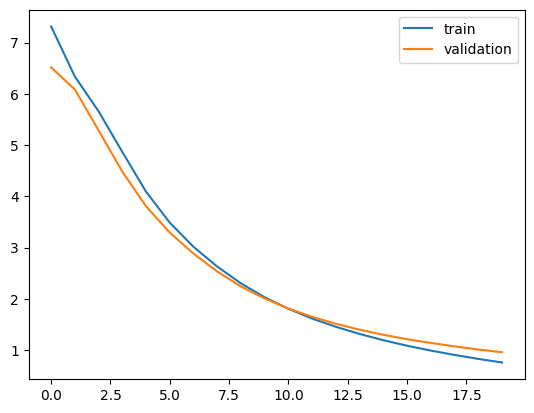

In [223]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [224]:
model.save('model_lstm.keras')

In [225]:
preds = model.predict([X_test, y_test.reshape(y_test.shape[0], y_test.shape[1], 1)])

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


# Model Inference

In [226]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [227]:
def decode_sequences(tokenizer, sequences):
    decoded_texts = []
    for sequence in sequences:
        decoded_words = []
        for int_val in sequence:
            word = get_word(int_val, tokenizer)
            if word is not None:
                decoded_words.append(word)
        decoded_texts.append(' '.join(decoded_words))
    return decoded_texts

In [228]:
preds_text = []

for i, pred in enumerate(preds):
    temp = []
    for j, token_probs in enumerate(pred):
        predicted_word_index = np.argmax(token_probs)
        t = get_word(predicted_word_index, indo_tokenizer)
        if j > 0:
            if (t == get_word(np.argmax(pred[j-1]), indo_tokenizer)) or (t is None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if t is None:
                temp.append('')
            else:
                temp.append(t)

    preds_text.append(' '.join(temp))

In [229]:
decoded_texts = decode_sequences(indo_tokenizer,y_test)
decoded_texts

['dan janganlah kamu menyebut siapa pun bapa di bumi ini karena hanya satu bapamu yaitu dia yang di sorga',
 'dan kamu akan dibenci semua orang oleh karena namaku',
 'setiap orang yang membenci saudaranya adalah seorang pembunuh manusia dan kamu tahu bahwa tidak ada seorang pembunuh yang tetap memiliki hidup yang kekal di dalam dirinya',
 'semua orang yang mendengar hal itu heran dan berkata bukankah dia ini yang di yerusalem mau membinasakan barangsiapa yang memanggil nama yesus ini dan bukankah ia datang ke sini dengan maksud untuk menangkap dan membawa mereka ke hadapan imamimam kepala',
 'ia menurunkan orangorang yang berkuasa dari takhtanya dan meninggikan orangorang yang rendah',
 'kelahiran yesus kristus adalah seperti berikut pada waktu maria ibunya bertunangan dengan yusuf ternyata ia mengandung dari roh kudus sebelum mereka hidup sebagai suami isteri',
 'dan hal itu jauh lebih nyata lagi jikalau ditetapkan seorang imam lain menurut cara melkisedek',
 'yang aku maksudkan ialah

In [230]:
for pred, actual in zip(preds_text, decoded_texts):
    print("Predicted:", pred)
    print("Actual:", actual)
    print()  # Print a blank line for better readability

Predicted: dan janganlah kamu menyebut siapa pun bapa di bumi ini karena hanya satu bapamu yaitu dia yang di sorga dan                                                
Actual: dan janganlah kamu menyebut siapa pun bapa di bumi ini karena hanya satu bapamu yaitu dia yang di sorga

Predicted: dan kamu akan menyesah semua orang oleh karena namaku dan                                                          
Actual: dan kamu akan dibenci semua orang oleh karena namaku

Predicted: setiap orang yang membenci saudaranya adalah seorang dan manusia dan kamu tahu bahwa tidak ada seorang dan yang tetap memiliki hidup yang kekal di dalam dirinya dan                                         
Actual: setiap orang yang membenci saudaranya adalah seorang pembunuh manusia dan kamu tahu bahwa tidak ada seorang pembunuh yang tetap memiliki hidup yang kekal di dalam dirinya

Predicted: semua orang yang mendengar hal itu heran dan berkata bukankah dia ini yang di yerusalem mau membinasakan barangsiapa yang m

In [231]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

In [232]:
# actual = nltk.word_tokenize('hal itu terjadi dari pihak tuhan suatu perbuatan ajaib di mata kita lanjutkan itu  dan ')
# pred = nltk.word_tokenize('hal itu terjadi dari pihak tuhan suatu perbuatan ajaib di mata kita')

references = [actual]

# Calculate BLEU score
bleu_score = sentence_bleu(references, pred)
print(f'Sentence BLEU score: {bleu_score:.2f}')

Sentence BLEU score: 0.77


In [233]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import numpy as np

def preprocess_text(text):
    return set(word_tokenize(text.lower()))

def calculate_exact_match_accuracy(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def calculate_token_level_metrics(y_true, y_pred):
    true_tokens = [preprocess_text(text) for text in y_true]
    pred_tokens = [preprocess_text(text) for text in y_pred]

    tp, fp, fn = 0, 0, 0
    for true, pred in zip(true_tokens, pred_tokens):
        tp += len(true.intersection(pred))
        fp += len(pred - true)
        fn += len(true - pred)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

def calculate_bleu_score(y_true, y_pred):
    bleu_scores = []
    for true, pred in zip(y_true, y_pred):
        reference = [word_tokenize(true.lower())]
        candidate = word_tokenize(pred.lower())
        bleu_scores.append(sentence_bleu(reference, candidate))
    return np.mean(bleu_scores)

def evaluate_translation(y_true, y_pred):
    exact_match_accuracy = calculate_exact_match_accuracy(y_true, y_pred)
    precision, recall, f1 = calculate_token_level_metrics(y_true, y_pred)
    bleu_score = calculate_bleu_score(y_true, y_pred)

    return {
        'Exact Match Accuracy': exact_match_accuracy,
        'Token-level Precision': precision,
        'Token-level Recall': recall,
        'Token-level F1 Score': f1,
        'BLEU Score': bleu_score
    }

# Example usage
results = evaluate_translation(decoded_texts, preds_text)
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Exact Match Accuracy: 0.0000
Token-level Precision: 0.9169
Token-level Recall: 0.8930
Token-level F1 Score: 0.9048
BLEU Score: 0.7221


In [1]:
pip install pipreqs

In [5]:
ter

/bin/bash: line 1: tensorflow: command not found
